In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import*

In [2]:
train_df=pd.read_csv('/kaggle/input/playground-series-s3e11/train.csv')
test_df=pd.read_csv('/kaggle/input/playground-series-s3e11/test.csv')
submission=pd.read_csv('/kaggle/input/playground-series-s3e11/sample_submission.csv')
train_df.head(5)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
train_df=train_df.drop('id',axis=1)
test_df=test_df.drop('id',axis=1)

In [4]:
test_df.head(5)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [5]:
x=train_df.drop('cost',axis=1)
y=train_df.cost 
print(x.shape)
print(y.shape)

(360336, 15)
(360336,)


In [6]:
import matplotlib.pyplot as plt
from matplotlib import*
import seaborn as sns
import matplotlib.colors as mcolors


In [7]:
train_df.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost'],
      dtype='object')

In [8]:
print(x.shape,y.shape)

(360336, 15) (360336,)


<AxesSubplot:>

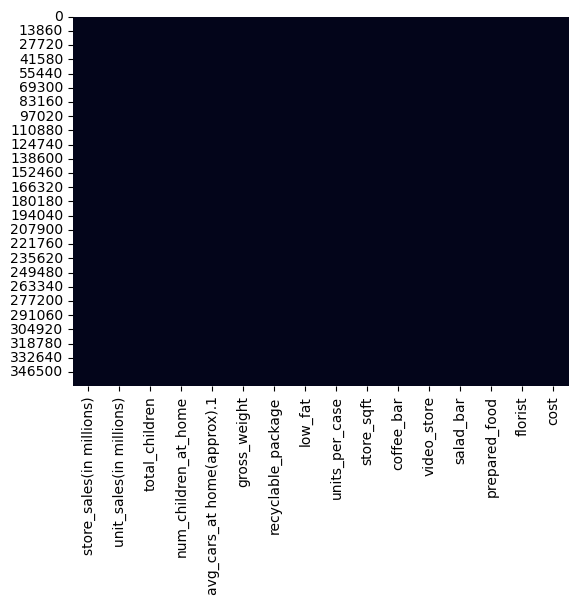

In [9]:
sns.heatmap(train_df.isnull(), cbar=False)

In [10]:
# import pandas_profiling
# profile=pandas_profiling.ProfileReport(train_df)
# profile

<AxesSubplot:>

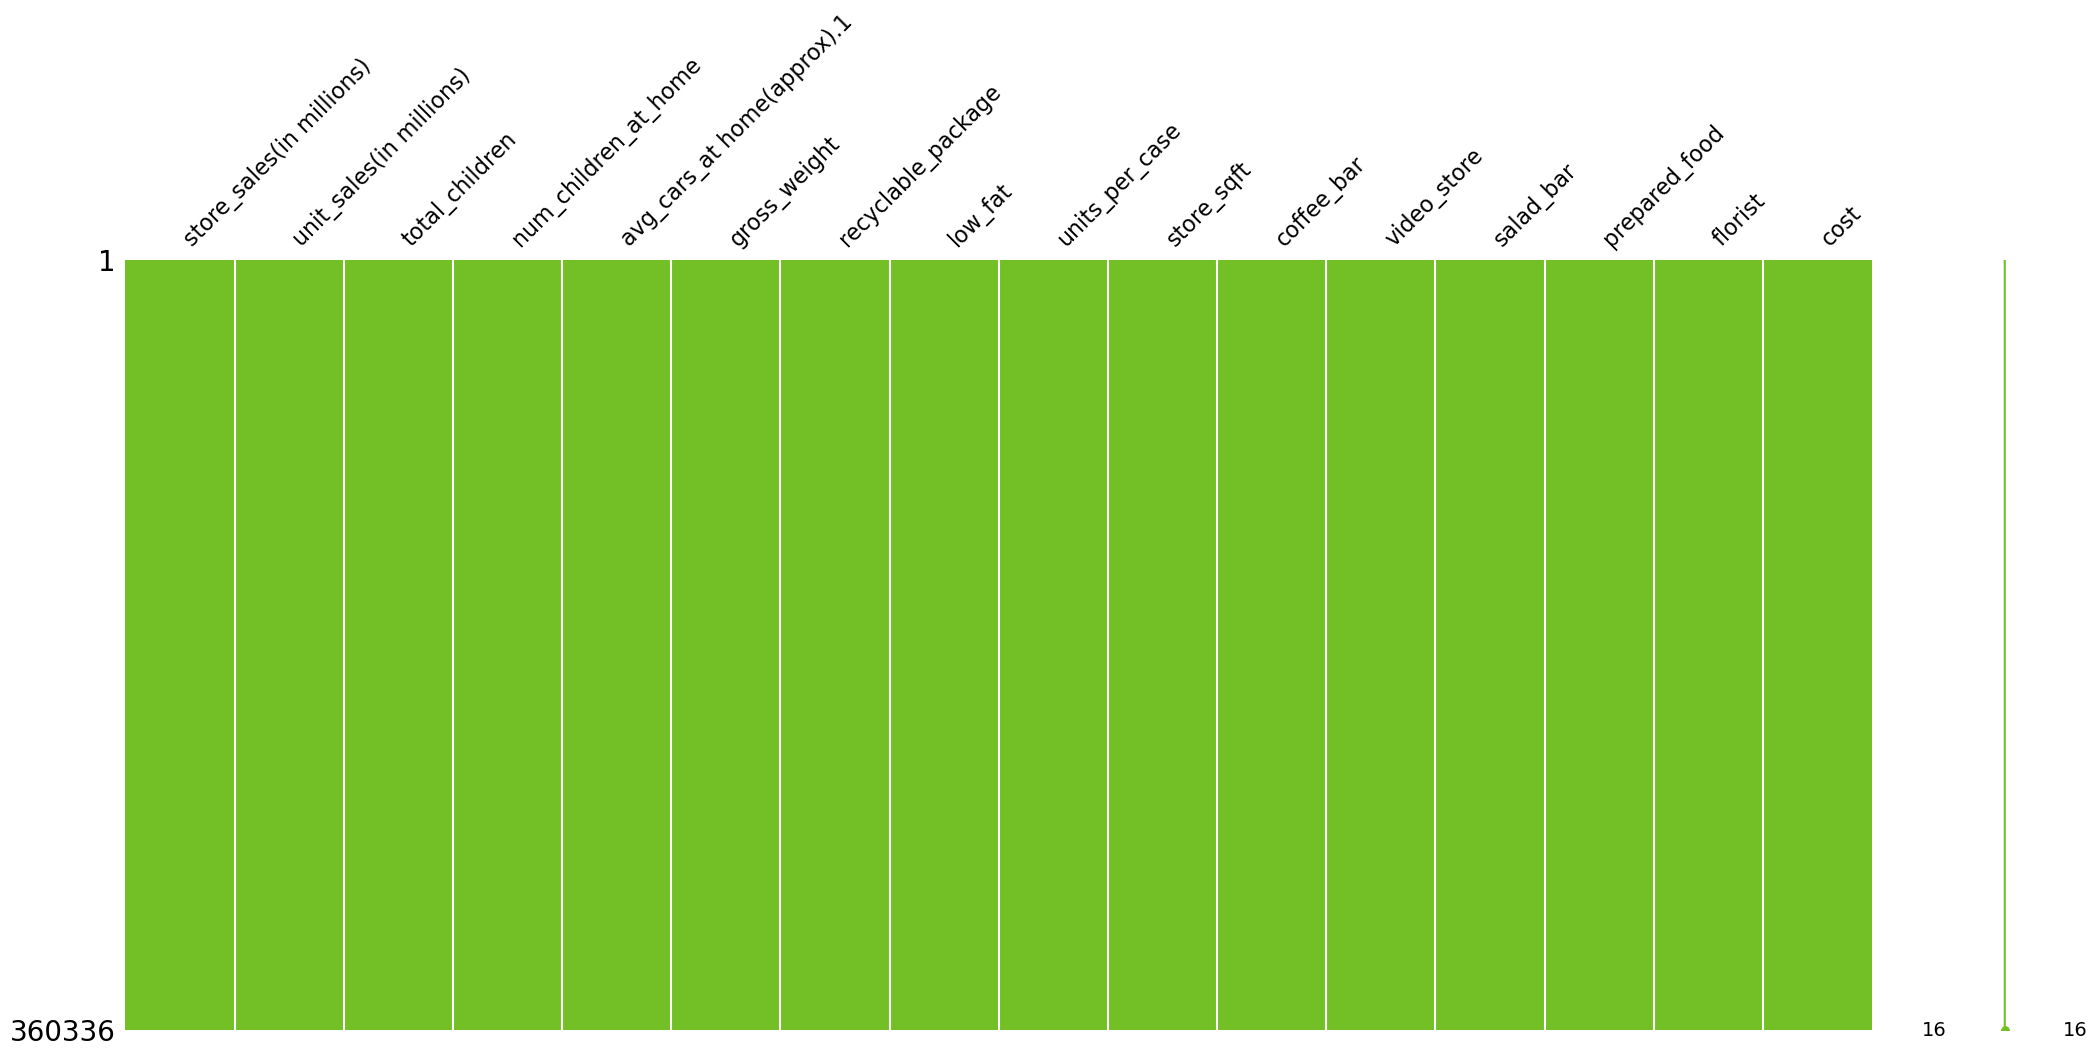

In [11]:
import missingno as msno
msno.matrix(train_df, filter=None, n=0, p=0, sort=None, figsize=(25, 10), width_ratios=(15, 1), color=(0.45, 0.75, 0.15), fontsize=16, labels=None, label_rotation=45, sparkline=True, freq=None, ax=None)

In [12]:
train_df.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost'],
      dtype='object')

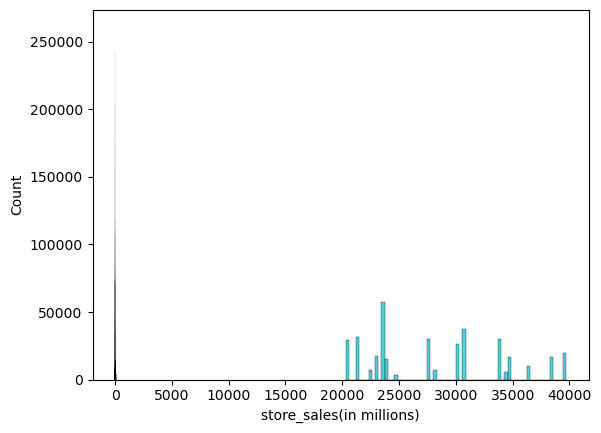

In [13]:
columns=train_df.columns.tolist()
for column in columns:
    sns.histplot(train_df[column],kde=False)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    360336 non-null  float64
 1   unit_sales(in millions)     360336 non-null  float64
 2   total_children              360336 non-null  float64
 3   num_children_at_home        360336 non-null  float64
 4   avg_cars_at home(approx).1  360336 non-null  float64
 5   gross_weight                360336 non-null  float64
 6   recyclable_package          360336 non-null  float64
 7   low_fat                     360336 non-null  float64
 8   units_per_case              360336 non-null  float64
 9   store_sqft                  360336 non-null  float64
 10  coffee_bar                  360336 non-null  float64
 11  video_store                 360336 non-null  float64
 12  salad_bar                   360336 non-null  float64
 13  prepared_food 

In [15]:
train_df.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [16]:
train_df.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost'],
      dtype='object')

In [17]:
train_df.isnull().any()

store_sales(in millions)      False
unit_sales(in millions)       False
total_children                False
num_children_at_home          False
avg_cars_at home(approx).1    False
gross_weight                  False
recyclable_package            False
low_fat                       False
units_per_case                False
store_sqft                    False
coffee_bar                    False
video_store                   False
salad_bar                     False
prepared_food                 False
florist                       False
cost                          False
dtype: bool

In [18]:
print(train_df.dtypes)

store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240224 entries, 0 to 240223
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   store_sales(in millions)    240224 non-null  float64
 1   unit_sales(in millions)     240224 non-null  float64
 2   total_children              240224 non-null  float64
 3   num_children_at_home        240224 non-null  float64
 4   avg_cars_at home(approx).1  240224 non-null  float64
 5   gross_weight                240224 non-null  float64
 6   recyclable_package          240224 non-null  float64
 7   low_fat                     240224 non-null  float64
 8   units_per_case              240224 non-null  float64
 9   store_sqft                  240224 non-null  float64
 10  coffee_bar                  240224 non-null  float64
 11  video_store                 240224 non-null  float64
 12  salad_bar                   240224 non-null  float64
 13  prepared_food 

In [20]:
test_df.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000,240224.000000
mean,6.353813,3.043930,2.454039,0.685381,2.198173,13.828380,0.565747,0.326928,18.959933,28174.648840,0.564173,0.275647,0.504396,0.504429,0.501815
std,3.307402,0.782982,1.487416,1.211368,1.085129,4.623458,0.495660,0.469092,10.216219,5974.494735,0.495866,0.446841,0.499982,0.499981,0.499998
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.800000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'store_sales(in millions)'}>,
        <AxesSubplot:title={'center':'unit_sales(in millions)'}>,
        <AxesSubplot:title={'center':'total_children'}>,
        <AxesSubplot:title={'center':'num_children_at_home'}>],
       [<AxesSubplot:title={'center':'avg_cars_at home(approx).1'}>,
        <AxesSubplot:title={'center':'gross_weight'}>,
        <AxesSubplot:title={'center':'recyclable_package'}>,
        <AxesSubplot:title={'center':'low_fat'}>],
       [<AxesSubplot:title={'center':'units_per_case'}>,
        <AxesSubplot:title={'center':'store_sqft'}>,
        <AxesSubplot:title={'center':'coffee_bar'}>,
        <AxesSubplot:title={'center':'video_store'}>],
       [<AxesSubplot:title={'center':'salad_bar'}>,
        <AxesSubplot:title={'center':'prepared_food'}>,
        <AxesSubplot:title={'center':'florist'}>,
        <AxesSubplot:title={'center':'cost'}>]], dtype=object)

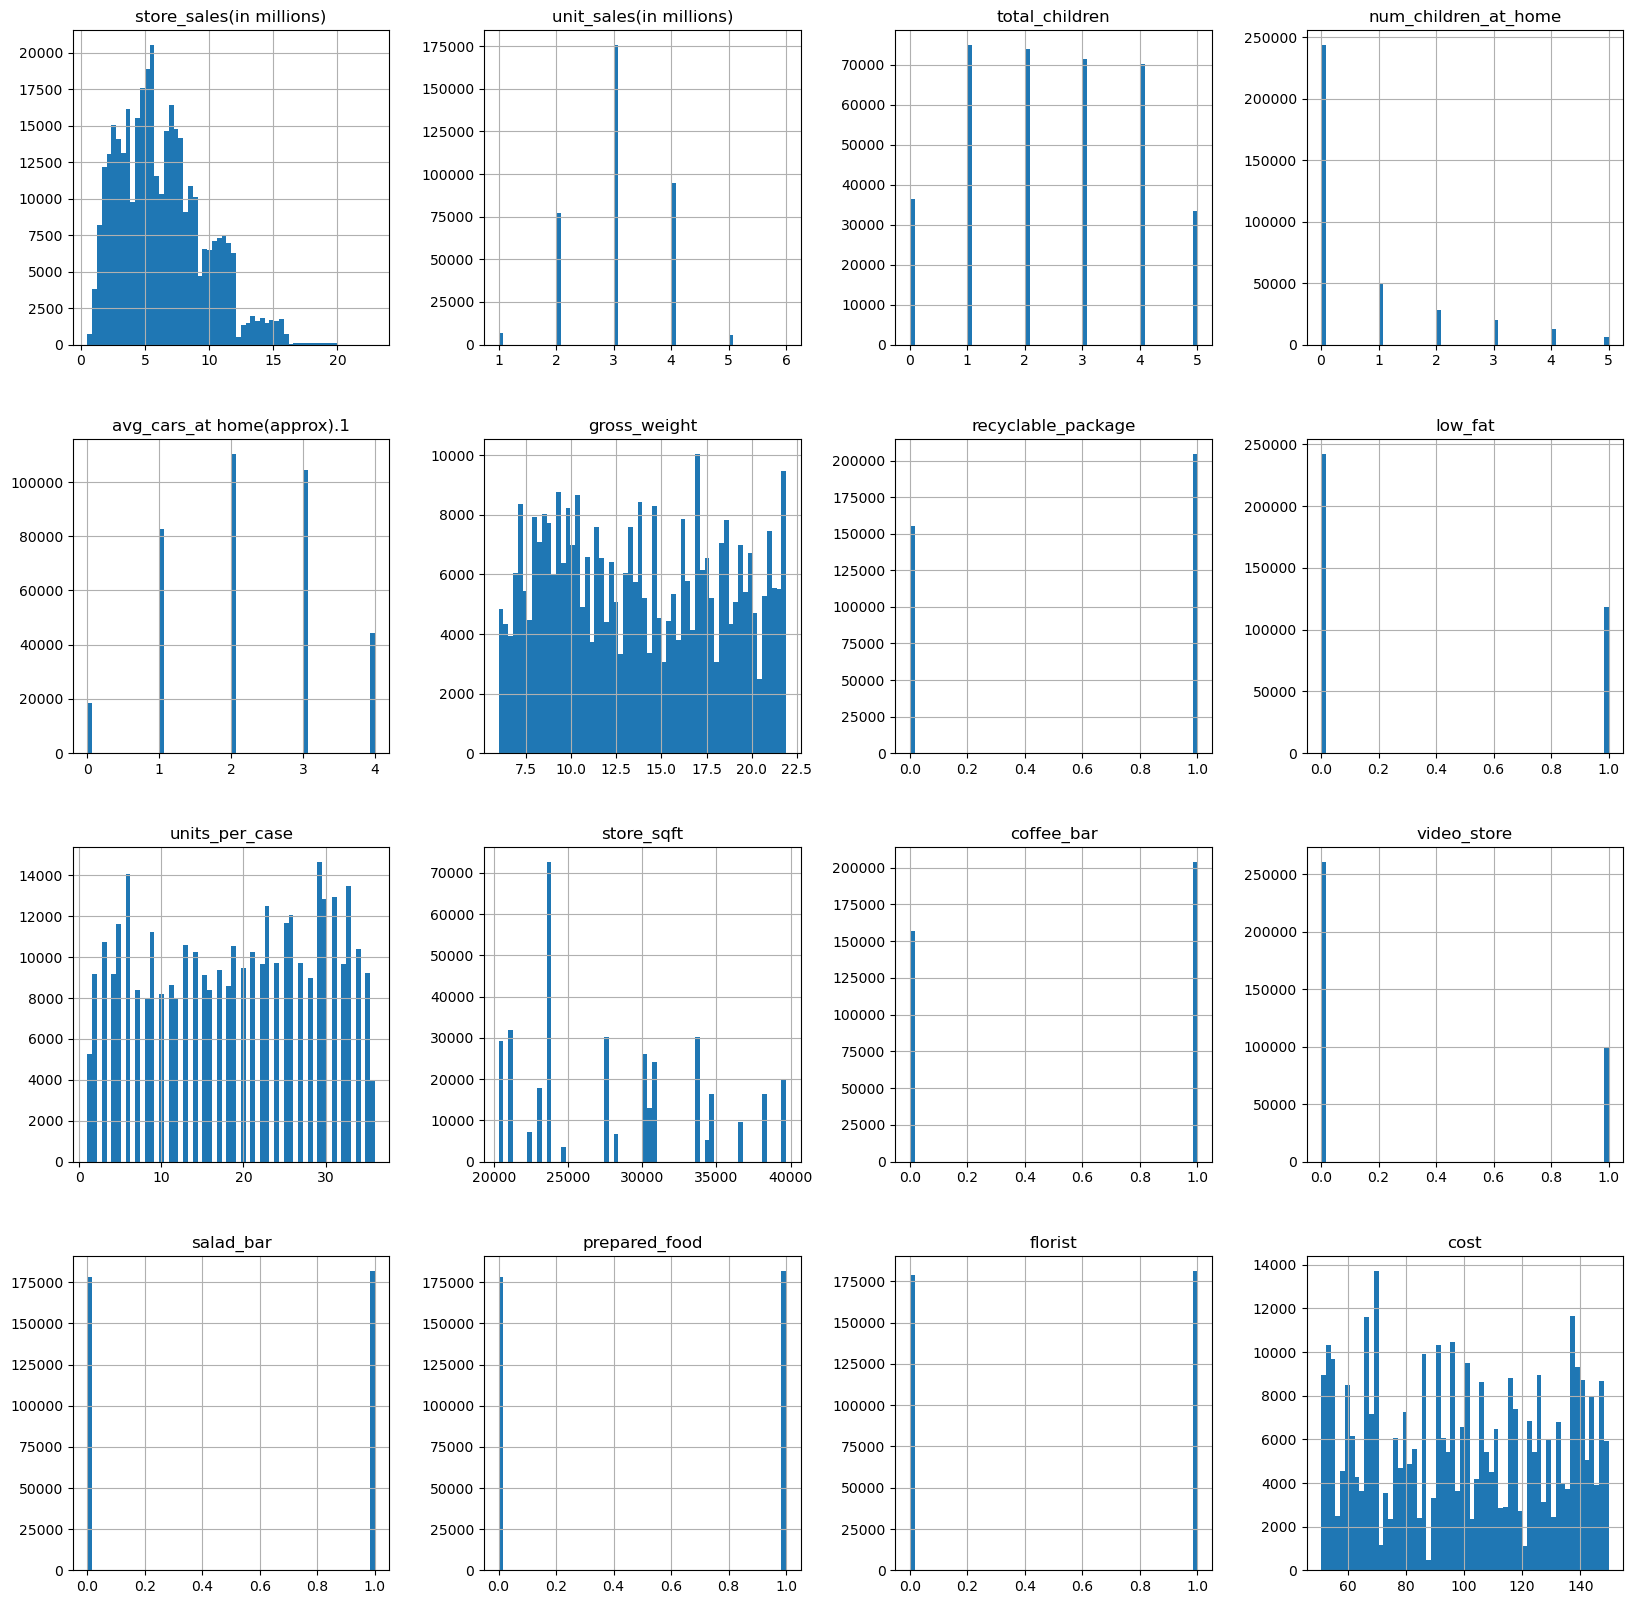

In [21]:
train_df.hist(bins=60,figsize=(20,20))

In [22]:
tdf1=train_df

In [23]:
pip install pygwalker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.9/620.9 kB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pygwalker as pyg

In [25]:
#pyg.walk(train_df)

In [26]:
Q1 = tdf1['store_sales(in millions)'].quantile(0.25)
Q3 = tdf1['store_sales(in millions)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df00 = tdf1[(tdf1['store_sales(in millions)'] >= lower_bound) & (tdf1['store_sales(in millions)'] <= upper_bound)]

print(train_df00)


        store_sales(in millions)  unit_sales(in millions)  total_children  \
0                           8.61                      3.0             2.0   
1                           5.00                      2.0             4.0   
2                          14.08                      4.0             0.0   
3                           4.02                      3.0             5.0   
4                           2.13                      3.0             5.0   
...                          ...                      ...             ...   
360331                      7.60                      4.0             5.0   
360332                     14.44                      4.0             4.0   
360333                     10.74                      3.0             0.0   
360334                     11.04                      3.0             1.0   
360335                      5.30                      2.0             2.0   

        num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0

In [27]:
train_df00

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


In [28]:
train_df00.isnull().any()

store_sales(in millions)      False
unit_sales(in millions)       False
total_children                False
num_children_at_home          False
avg_cars_at home(approx).1    False
gross_weight                  False
recyclable_package            False
low_fat                       False
units_per_case                False
store_sqft                    False
coffee_bar                    False
video_store                   False
salad_bar                     False
prepared_food                 False
florist                       False
cost                          False
dtype: bool

In [29]:
train_df00.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost'],
      dtype='object')

Text(0.5, 1.05, 'Correlation of Features')

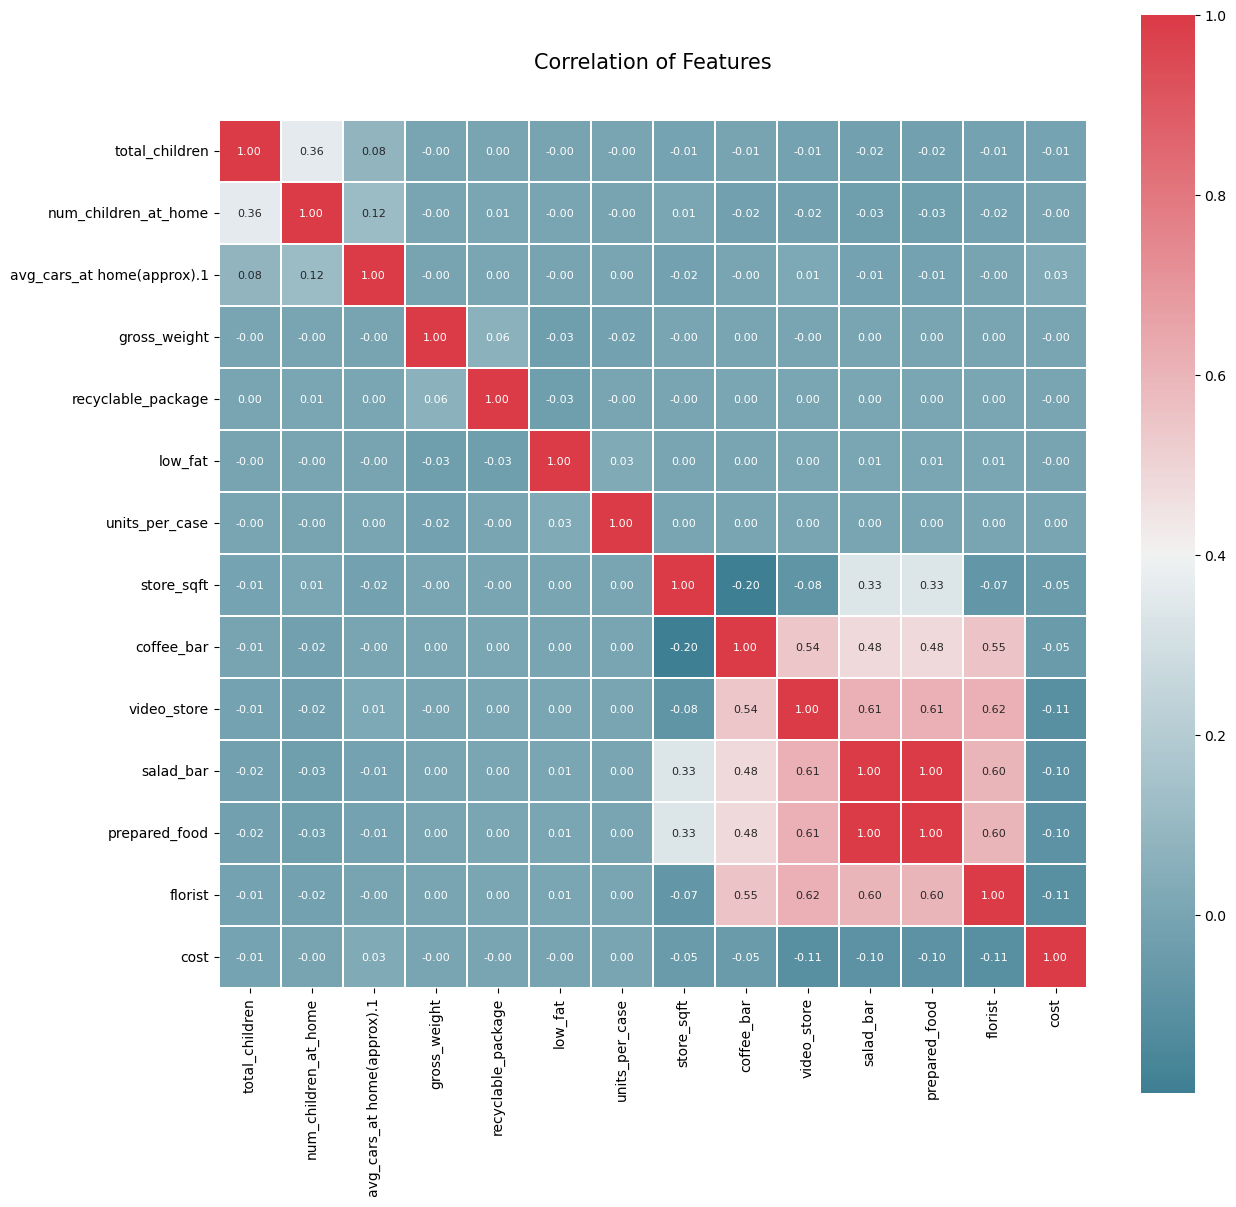

In [30]:
corr = train_df00.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Features', y=1.05, size=15)

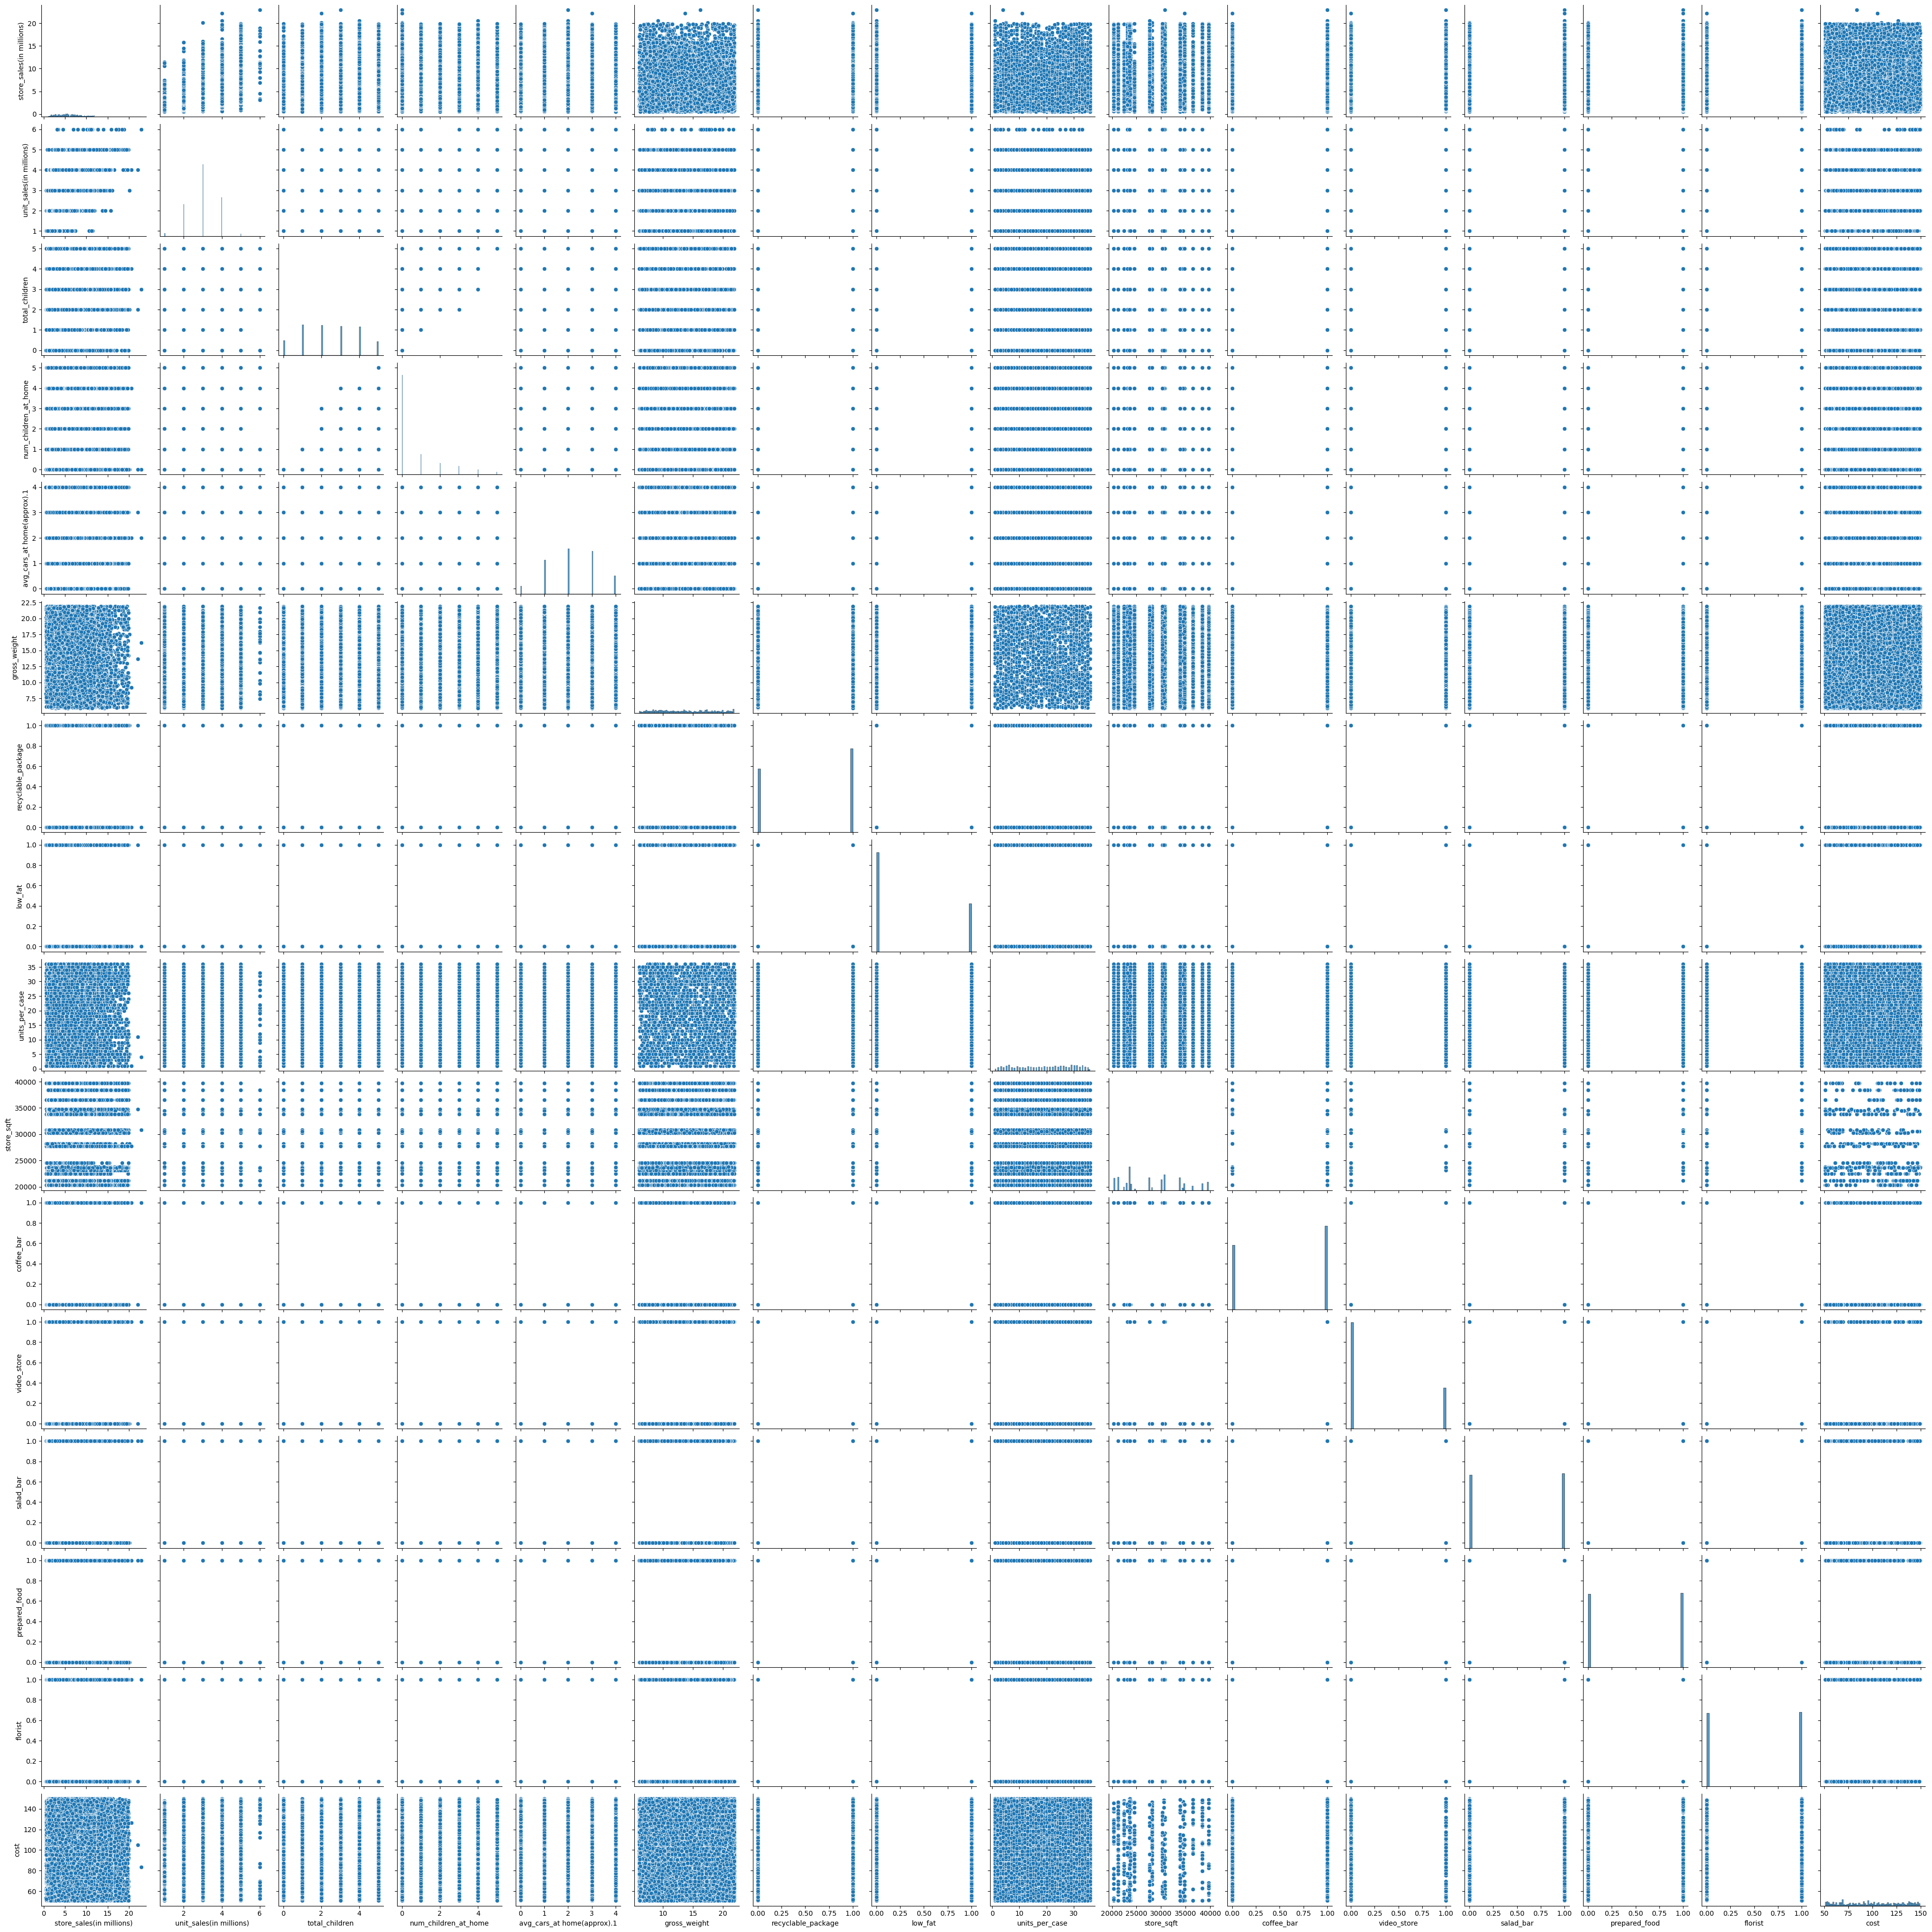

In [31]:
sns.pairplot(train_df)

In [32]:
train_df.corr()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),1.000000,0.481376,0.069303,0.029261,0.006794,0.038159,0.030390,-0.008735,-0.009893,0.021572,-0.040039,0.029564,0.044832,0.044854,0.046472,-0.012387
unit_sales(in millions),0.481376,1.000000,0.113231,0.046755,0.017119,0.000467,0.001074,-0.003663,0.001141,0.045540,-0.076967,0.053795,0.082445,0.082485,0.083062,-0.026509
total_children,0.069303,0.113231,1.000000,0.359207,0.078519,-0.000908,0.002236,-0.001597,-0.000267,-0.008991,-0.006476,-0.013303,-0.023564,-0.023560,-0.012545,-0.007482
num_children_at_home,0.029261,0.046755,0.359207,1.000000,0.115476,-0.000601,0.006104,-0.000208,-0.004174,0.005785,-0.023234,-0.020738,-0.031109,-0.031050,-0.017888,-0.001727
avg_cars_at home(approx).1,0.006794,0.017119,0.078519,0.115476,1.000000,-0.002267,0.004021,-0.001912,0.001190,-0.020032,-0.000441,0.012702,-0.013102,-0.013035,-0.004284,0.027098
gross_weight,0.038159,0.000467,-0.000908,-0.000601,-0.002267,1.000000,0.059050,-0.033421,-0.017609,-0.000455,0.000835,-0.000845,0.002116,0.002155,0.000764,-0.000116
recyclable_package,0.030390,0.001074,0.002236,0.006104,0.004021,0.059050,1.000000,-0.030025,-0.003028,-0.000343,0.004037,0.004129,0.004674,0.004672,0.004849,-0.001455
low_fat,-0.008735,-0.003663,-0.001597,-0.000208,-0.001912,-0.033421,-0.030025,1.000000,0.030226,0.001972,0.002622,0.002893,0.005602,0.005567,0.005540,-0.001975
units_per_case,-0.009893,0.001141,-0.000267,-0.004174,0.001190,-0.017609,-0.003028,0.030226,1.000000,0.002297,0.000828,0.000569,0.001698,0.001699,0.000556,0.000180
store_sqft,0.021572,0.045540,-0.008991,0.005785,-0.020032,-0.000455,-0.000343,0.001972,0.002297,1.000000,-0.198243,-0.083873,0.333055,0.333102,-0.074157,-0.049201


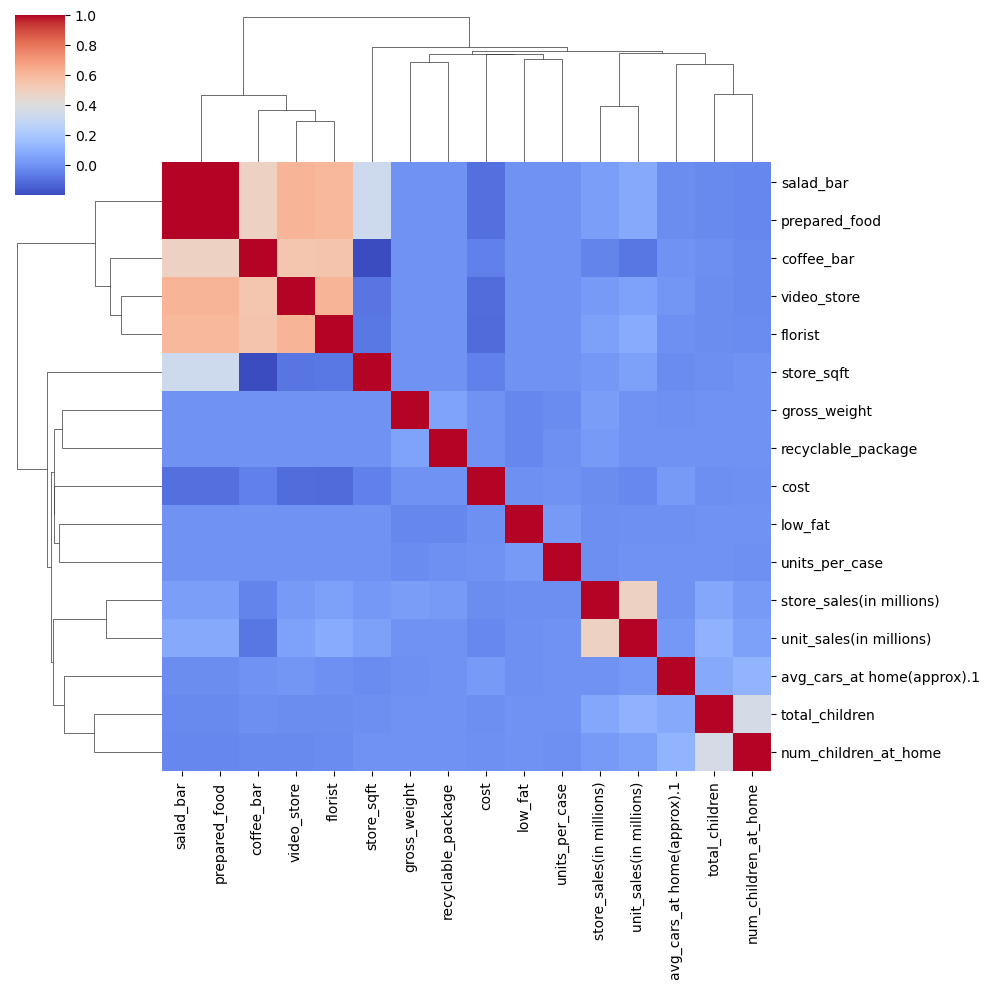

In [33]:
sns.clustermap(train_df.corr(), cmap="coolwarm")

In [34]:
train_df.corr().style.background_gradient(cmap='coolwarm')

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),1.000000,0.481376,0.069303,0.029261,0.006794,0.038159,0.030390,-0.008735,-0.009893,0.021572,-0.040039,0.029564,0.044832,0.044854,0.046472,-0.012387
unit_sales(in millions),0.481376,1.000000,0.113231,0.046755,0.017119,0.000467,0.001074,-0.003663,0.001141,0.045540,-0.076967,0.053795,0.082445,0.082485,0.083062,-0.026509
total_children,0.069303,0.113231,1.000000,0.359207,0.078519,-0.000908,0.002236,-0.001597,-0.000267,-0.008991,-0.006476,-0.013303,-0.023564,-0.023560,-0.012545,-0.007482
num_children_at_home,0.029261,0.046755,0.359207,1.000000,0.115476,-0.000601,0.006104,-0.000208,-0.004174,0.005785,-0.023234,-0.020738,-0.031109,-0.031050,-0.017888,-0.001727
avg_cars_at home(approx).1,0.006794,0.017119,0.078519,0.115476,1.000000,-0.002267,0.004021,-0.001912,0.001190,-0.020032,-0.000441,0.012702,-0.013102,-0.013035,-0.004284,0.027098
gross_weight,0.038159,0.000467,-0.000908,-0.000601,-0.002267,1.000000,0.059050,-0.033421,-0.017609,-0.000455,0.000835,-0.000845,0.002116,0.002155,0.000764,-0.000116
recyclable_package,0.030390,0.001074,0.002236,0.006104,0.004021,0.059050,1.000000,-0.030025,-0.003028,-0.000343,0.004037,0.004129,0.004674,0.004672,0.004849,-0.001455
low_fat,-0.008735,-0.003663,-0.001597,-0.000208,-0.001912,-0.033421,-0.030025,1.000000,0.030226,0.001972,0.002622,0.002893,0.005602,0.005567,0.005540,-0.001975
units_per_case,-0.009893,0.001141,-0.000267,-0.004174,0.001190,-0.017609,-0.003028,0.030226,1.000000,0.002297,0.000828,0.000569,0.001698,0.001699,0.000556,0.000180
store_sqft,0.021572,0.045540,-0.008991,0.005785,-0.020032,-0.000455,-0.000343,0.001972,0.002297,1.000000,-0.198243,-0.083873,0.333055,0.333102,-0.074157,-0.049201


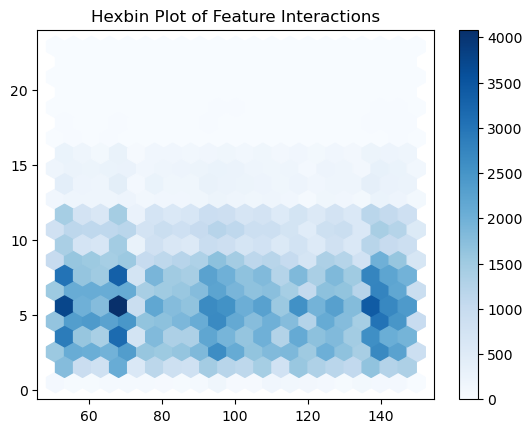

In [35]:
plt.hexbin(train_df['cost'], train_df['store_sales(in millions)'], gridsize=20, cmap='Blues')
plt.colorbar()
plt.title('Hexbin Plot of Feature Interactions')
plt.show()


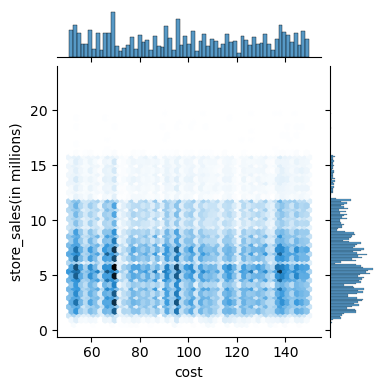

In [36]:
sns.jointplot(x = 'cost',y = 'store_sales(in millions)',data = train_df,kind = 'hex',height=4,color=None)
plt.show()

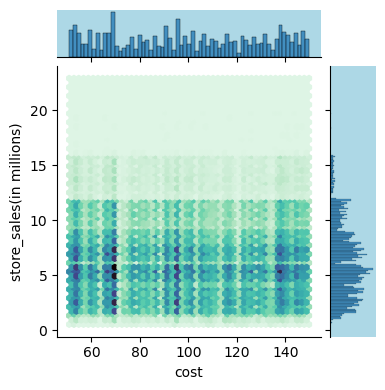

In [37]:
jp=sns.jointplot(x = 'cost',y = 'store_sales(in millions)',data = train_df,kind = 'hex',height=4,color=None)

jp.ax_joint.collections[0].set_alpha(1)
jp.ax_joint.collections[0].set_cmap('mako_r')
jp.ax_marg_x.set_facecolor('lightblue')
jp.ax_marg_y.set_facecolor('lightblue')
plt.show()


In [38]:
columns=train_df.columns.tolist()

In [39]:
columns

['store_sales(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'gross_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'cost']

In [40]:
train_df

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,7.60,4.0,5.0,5.0,3.0,13.50,1.0,0.0,33.0,30268.0,0.0,0.0,0.0,0.0,0.0,133.42
360332,14.44,4.0,4.0,0.0,4.0,18.80,1.0,1.0,18.0,20319.0,0.0,0.0,0.0,0.0,0.0,81.85
360333,10.74,3.0,0.0,0.0,2.0,11.30,1.0,0.0,35.0,30584.0,1.0,1.0,1.0,1.0,1.0,87.07
360334,11.04,3.0,1.0,0.0,3.0,10.20,0.0,1.0,14.0,30584.0,1.0,1.0,1.0,1.0,1.0,146.72


Feature: 0, Score: 0.26516
Feature: 1, Score: 0.04968
Feature: 2, Score: 0.05499
Feature: 3, Score: 0.03869
Feature: 4, Score: 0.04982
Feature: 5, Score: 0.23680
Feature: 6, Score: 0.02922
Feature: 7, Score: 0.02782
Feature: 8, Score: 0.17157
Feature: 9, Score: 0.05260
Feature: 10, Score: 0.00561
Feature: 11, Score: 0.00261
Feature: 12, Score: 0.00172
Feature: 13, Score: 0.00227
Feature: 14, Score: 0.01146


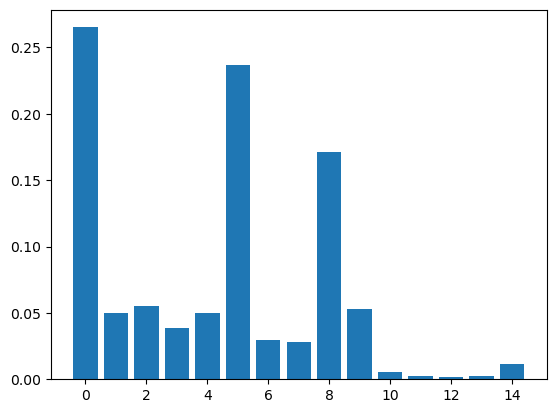

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x, y)
importance = rf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()



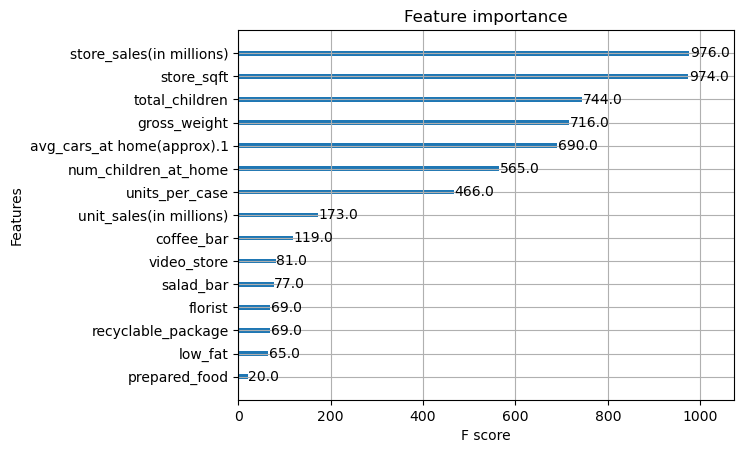

In [42]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBRegressor()
model.fit(x, y)
plot_importance(model)
plt.show()


In [43]:
corr_matrix = train_df.corr()
print(corr_matrix["cost"].sort_values(ascending=False))


cost                          1.000000
avg_cars_at home(approx).1    0.027098
units_per_case                0.000180
gross_weight                 -0.000116
recyclable_package           -0.001455
num_children_at_home         -0.001727
low_fat                      -0.001975
total_children               -0.007482
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
store_sqft                   -0.049201
coffee_bar                   -0.052086
salad_bar                    -0.098810
prepared_food                -0.098843
video_store                  -0.106786
florist                      -0.110414
Name: cost, dtype: float64


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x, y, test_size=0.33, random_state=1)

In [46]:
from tpot import TPOTRegressor

In [47]:
tpot = TPOTRegressor(generations=3, population_size=10, verbosity=2, random_state=42)
tpot.fit(x_train_,y_train_)


Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -794.9090809421677

Generation 2 - Current best internal CV score: -794.9090809421677

Generation 3 - Current best internal CV score: -794.9090809421677

Best pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.01), bootstrap=True, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)


TPOTRegressor(generations=3, population_size=10, random_state=42, verbosity=2)

In [48]:
from sklearn.pipeline import make_pipeline

In [49]:
tpot.export('tpot_pipeline.py')

In [50]:
p=tpot.predict(test_df)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  "X does not have valid feature names, but"


In [51]:
df_sub = pd.read_csv('/kaggle/input/playground-series-s3e11/sample_submission.csv')
df_sub['cost']=p



df_sub.to_csv('submissiongams3e11.csv', index=False)